Pitch Prediction of Jason deGrom

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
# Training parameters
lr = 0.001
train_batch_size = 32
n_epochs = 100
n_hidden1 = 32
n_hidden2 = 16
dropout_rate = 0.5
test_pct = 0.2
seed = 3105

df = pd.read_csv("Jason deGrom.csv")

In [3]:
df = df[['count','previous count','previous pitch','outs_whenup','run difference','on_3bb','on_2bb','on_1bb','stand','pitch_name','expected_pitch_name'
]]

In [4]:
df.head(20)

,count,previous count,previous pitch,outs_whenup,run difference,on_3bb,on_2bb,on_1bb,stand,pitch_name,expected_pitch_name
0,'22','22',4-Seam Fastball,'2','0',0,1,0,L,Slider,NaN
1,'22','22',Changeup,'2','0',0,1,0,L,4-Seam Fastball,Slider
2,'22','12',Changeup,'2','0',0,1,0,L,Changeup,4-Seam Fastball
3,'12','12',Changeup,'2','0',0,1,0,L,Changeup,Changeup
4,'12','12',Slider,'2','0',0,1,0,L,Changeup,Changeup
5,'12','02',4-Seam Fastball,'2','0',0,1,0,L,Slider,Changeup
6,'02','02',Slider,'2','0',0,1,0,L,4-Seam Fastball,Slider
7,'02','01',Slider,'2','0',0,1,0,L,Slider,4-Seam Fastball
8,'01','00',Slider,'2','0',0,0,1,L,Slider,Slider
9,'00',NaN,NaN,'2','0',0,0,1,L,Slider,Slider


In [5]:
df = df.dropna()

In [6]:
df.head(20)

,count,previous count,previous pitch,outs_whenup,run difference,on_3bb,on_2bb,on_1bb,stand,pitch_name,expected_pitch_name
1,'22','22',Changeup,'2','0',0,1,0,L,4-Seam Fastball,Slider
2,'22','12',Changeup,'2','0',0,1,0,L,Changeup,4-Seam Fastball
3,'12','12',Changeup,'2','0',0,1,0,L,Changeup,Changeup
4,'12','12',Slider,'2','0',0,1,0,L,Changeup,Changeup
5,'12','02',4-Seam Fastball,'2','0',0,1,0,L,Slider,Changeup
6,'02','02',Slider,'2','0',0,1,0,L,4-Seam Fastball,Slider
7,'02','01',Slider,'2','0',0,1,0,L,Slider,4-Seam Fastball
8,'01','00',Slider,'2','0',0,0,1,L,Slider,Slider
11,'31','21',Changeup,'2','0',0,0,0,L,Slider,4-Seam Fastball
12,'21','11',Changeup,'2','0',0,0,0,L,Changeup,Slider


In [7]:
df = pd.get_dummies(df)

In [8]:
df.head(20)

,on_3bb,on_2bb,on_1bb,count_'01',count_'02',count_'10',count_'11',count_'12',count_'20',count_'21',...,pitch_name_2-Seam Fastball,pitch_name_4-Seam Fastball,pitch_name_Changeup,pitch_name_Curveball,pitch_name_Slider,expected_pitch_name_2-Seam Fastball,expected_pitch_name_4-Seam Fastball,expected_pitch_name_Changeup,expected_pitch_name_Curveball,expected_pitch_name_Slider
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
6,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
8,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
12,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [9]:
df.shape

(3941, 55)

In [10]:
df_train, df_test = train_test_split(df, test_size=test_pct, random_state=seed)
df_train, df_val = train_test_split(df_train, test_size=test_pct, random_state=seed)

In [11]:
df_train

,on_3bb,on_2bb,on_1bb,count_'01',count_'02',count_'10',count_'11',count_'12',count_'20',count_'21',...,pitch_name_2-Seam Fastball,pitch_name_4-Seam Fastball,pitch_name_Changeup,pitch_name_Curveball,pitch_name_Slider,expected_pitch_name_2-Seam Fastball,expected_pitch_name_4-Seam Fastball,expected_pitch_name_Changeup,expected_pitch_name_Curveball,expected_pitch_name_Slider
665,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3454,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1060,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1970,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1598,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2992,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4720,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [12]:
y_length = 5
x_length = df_train.shape[1] - y_length

x_train = df_train[df_train.columns[0:x_length]].values.astype('float32')
y_train = df_train[df_train.columns[x_length:df_train.shape[1]]].values.astype('float32')

x_val = df_val[df_val.columns[0:x_length]].values.astype('float32')
y_val = df_val[df_val.columns[x_length:df_train.shape[1]]].values.astype('float32')

x_test = df_test[df_test.columns[0:x_length]].values.astype('float32')
y_test = df_test[df_test.columns[x_length:df_train.shape[1]]].values.astype('float32')

In [13]:
x_train.shape, x_val.shape, x_test.shape

((2521, 50), (631, 50), (789, 50))

In [14]:
y_train.shape, y_val.shape, y_test.shape

((2521, 5), (631, 5), (789, 5))

In [15]:
scaler = MinMaxScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [16]:
x_train_scaled.shape, x_val_scaled.shape, x_test_scaled.shape

((2521, 50), (631, 50), (789, 50))

In [17]:
n_features = x_train_scaled.shape[1]
n_predictions = y_train.shape[1]

In [18]:
inputs = keras.Input(shape=(n_features,), name="inputs")
x = layers.Dense(n_hidden1, activation="relu", name="dense_1")(inputs)
x = layers.Dropout(dropout_rate)(x)
x = layers.Dense(n_hidden2, activation="relu", name="dense_2")(x)
x = layers.Dropout(dropout_rate)(x)
outputs = layers.Dense(n_predictions, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 50)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1632      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
predictions (Dense)          (None, 5)                 85        
Total params: 2,245
Trainable params: 2,245
Non-trainable params: 0
____________________________________________________

In [19]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate = lr),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.CategoricalAccuracy()],
)

In [20]:
history = model.fit(
    x_train_scaled,
    y_train,
    batch_size=train_batch_size,
    epochs=n_epochs,
    validation_data=(x_val_scaled, y_val),
)

Epoch 1/100
79/79 [==============================] - 0s 4ms/step - loss: 1.6221 - categorical_accuracy: 0.2737 - val_loss: 1.5131 - val_categorical_accuracy: 0.4025
Epoch 2/100
79/79 [==============================] - 0s 947us/step - loss: 1.4993 - categorical_accuracy: 0.3562 - val_loss: 1.3974 - val_categorical_accuracy: 0.4279
Epoch 3/100
79/79 [==============================] - 0s 833us/step - loss: 1.4213 - categorical_accuracy: 0.3967 - val_loss: 1.3324 - val_categorical_accuracy: 0.4311
Epoch 4/100
79/79 [==============================] - 0s 795us/step - loss: 1.3924 - categorical_accuracy: 0.3816 - val_loss: 1.3077 - val_categorical_accuracy: 0.4358
Epoch 5/100
79/79 [==============================] - 0s 946us/step - loss: 1.3501 - categorical_accuracy: 0.4046 - val_loss: 1.2838 - val_categorical_accuracy: 0.4326
Epoch 6/100
79/79 [==============================] - 0s 1ms/step - loss: 1.3383 - categorical_accuracy: 0.4137 - val_loss: 1.2793 - val_categorical_accuracy: 0.4342
Ep

Epoch 50/100
79/79 [==============================] - 0s 846us/step - loss: 1.2159 - categorical_accuracy: 0.4720 - val_loss: 1.2316 - val_categorical_accuracy: 0.4279
Epoch 51/100
79/79 [==============================] - 0s 833us/step - loss: 1.2291 - categorical_accuracy: 0.4736 - val_loss: 1.2337 - val_categorical_accuracy: 0.4326
Epoch 52/100
79/79 [==============================] - 0s 840us/step - loss: 1.2216 - categorical_accuracy: 0.4736 - val_loss: 1.2332 - val_categorical_accuracy: 0.4295
Epoch 53/100
79/79 [==============================] - 0s 815us/step - loss: 1.2145 - categorical_accuracy: 0.4744 - val_loss: 1.2309 - val_categorical_accuracy: 0.4295
Epoch 54/100
79/79 [==============================] - 0s 795us/step - loss: 1.2203 - categorical_accuracy: 0.4661 - val_loss: 1.2322 - val_categorical_accuracy: 0.4406
Epoch 55/100
79/79 [==============================] - 0s 821us/step - loss: 1.2197 - categorical_accuracy: 0.4633 - val_loss: 1.2327 - val_categorical_accuracy:

Epoch 99/100
79/79 [==============================] - 0s 828us/step - loss: 1.1904 - categorical_accuracy: 0.4823 - val_loss: 1.2390 - val_categorical_accuracy: 0.4311
Epoch 100/100
79/79 [==============================] - 0s 858us/step - loss: 1.1934 - categorical_accuracy: 0.4756 - val_loss: 1.2402 - val_categorical_accuracy: 0.4279


Text(0, 0.5, 'loss')

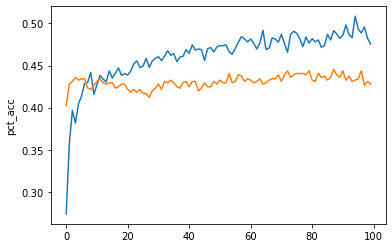

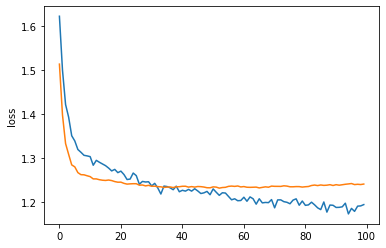

In [21]:
rslt = history.history

plt.figure()
plt.plot(rslt['categorical_accuracy'])
plt.plot(rslt['val_categorical_accuracy'])
plt.ylabel('pct_acc')

plt.figure()
plt.plot(rslt['loss'])
plt.plot(rslt['val_loss'])
plt.ylabel('loss')

In [22]:
results = model.evaluate(x_test_scaled, y_test)
print("test loss, test acc:", results)

25/25 [==============================] - 0s 559us/step - loss: 1.2361 - categorical_accuracy: 0.4613
test loss, test acc: [1.236088752746582, 0.4613434672355652]
